<a href="https://colab.research.google.com/github/sudheesn/sudheesn/blob/main/SNS_INN_Learner_Notebook_Low_code_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

In [ ]:
# !pip install tensorflow --upgrade --force-reinstall

In [ ]:
!pip install tensorflow
!pip install scikeras

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics
from sklearn import metrics
#snsu99 added line below
from sklearn.metrics import classification_report

from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor

import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
filename = "/content/drive/My Drive/aimlcontent/04B-IntroToNeuralNetworks/Churn.csv"
ds = pd.read_csv(filename)  # Complete the code to read the dataset

## Data Overview

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### View the first and last 5 rows of the dataset.

In [ ]:
ds.head() ## Complete the code to display the first 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds.tail() ## Complete the code to display the last 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [ ]:
ds.shape ## Complete the code to get the shape of data

(10000, 14)

### Check the data types of the columns for the dataset

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking the Statistical Summary

In [ ]:
ds.describe() ## Complete the code to print the statistical summary of the data

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Checking for unique values for each of the column

In [ ]:
#ds.unique() ## Complete the code to get the unique values in each of the column
for column in ds.columns:
    unique_values = ds[column].unique()
    unique_values_count = unique_values.size
    #print("Unique values in ",column," is ", unique_values)
    print("Number of Unique values in ", column, " is ", unique_values_count)

Number of Unique values in  RowNumber  is  10000
Number of Unique values in  CustomerId  is  10000
Number of Unique values in  Surname  is  2932
Number of Unique values in  CreditScore  is  460
Number of Unique values in  Geography  is  3
Number of Unique values in  Gender  is  2
Number of Unique values in  Age  is  70
Number of Unique values in  Tenure  is  11
Number of Unique values in  Balance  is  6382
Number of Unique values in  NumOfProducts  is  4
Number of Unique values in  HasCrCard  is  2
Number of Unique values in  IsActiveMember  is  2
Number of Unique values in  EstimatedSalary  is  9999
Number of Unique values in  Exited  is  2


### Checking for Missing Values

In [ ]:
#ds.'_______' ## Complete the code to check duplicate entries in the data
for column in ds.columns:
    null_values = ds[column].isnull().sum()
    print(f"null values in {column}:", null_values)

null values in RowNumber: 0
null values in CustomerId: 0
null values in Surname: 0
null values in CreditScore: 0
null values in Geography: 0
null values in Gender: 0
null values in Age: 0
null values in Tenure: 0
null values in Balance: 0
null values in NumOfProducts: 0
null values in HasCrCard: 0
null values in IsActiveMember: 0
null values in EstimatedSalary: 0
null values in Exited: 0


In [ ]:
#duplicate_rows = ds[ds.duplicated()]
duplicate_rows_count = ds.duplicated().sum()

#print("Duplicate rows in the DataFrame:\n", duplicate_rows)
print("Duplicate rows in the DataFrame:\n", duplicate_rows_count)

Duplicate rows in the DataFrame:
 0


### Drop the columns which are unique for all users like IDs, names, and rownumbers

In [ ]:
# RowNumber , CustomerId and Surname are unique hence drop them
#ds = ds.drop(['_____', '_____', '_____'], axis=1)  # complete the code to drop the columns with most unique values
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)  # complete the code to drop the columns with most unique values
ds.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

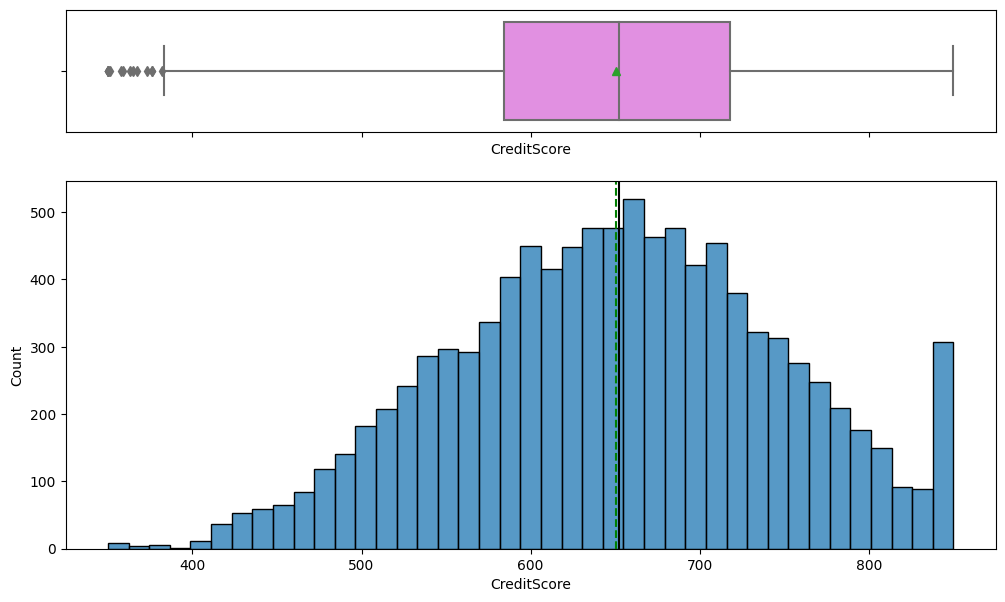

In [ ]:
histogram_boxplot(ds,'CreditScore')

#### Observations on Age

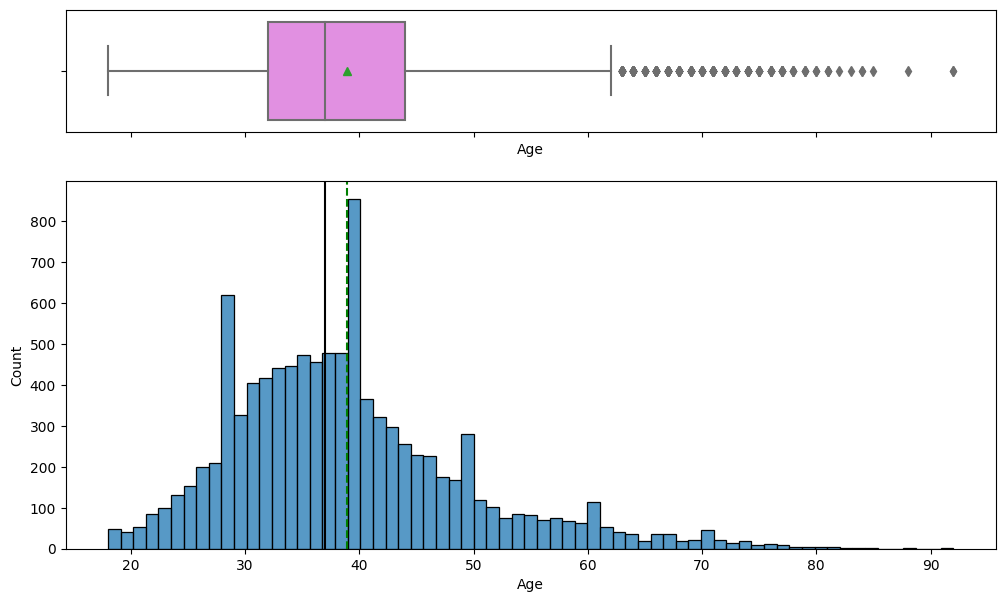

In [ ]:
histogram_boxplot(ds,'Age')          ## Complete the code to create histogram_boxplot for CreditScore

#### Observations on Balance

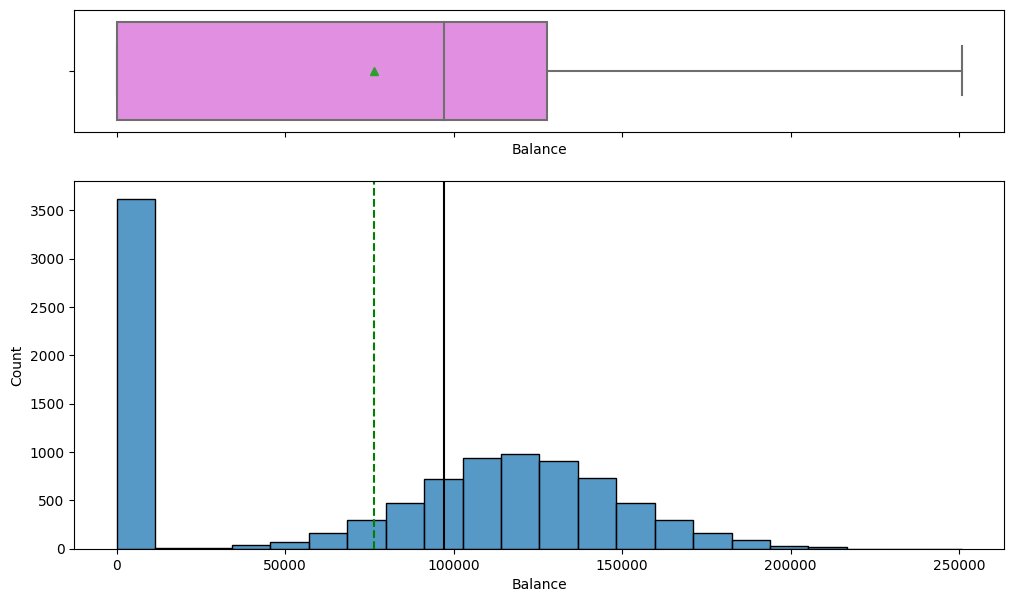

In [ ]:
histogram_boxplot(ds,'Balance')          ## Complete the code to create histogram_boxplot for Balance

#### Observations on Estimated Salary

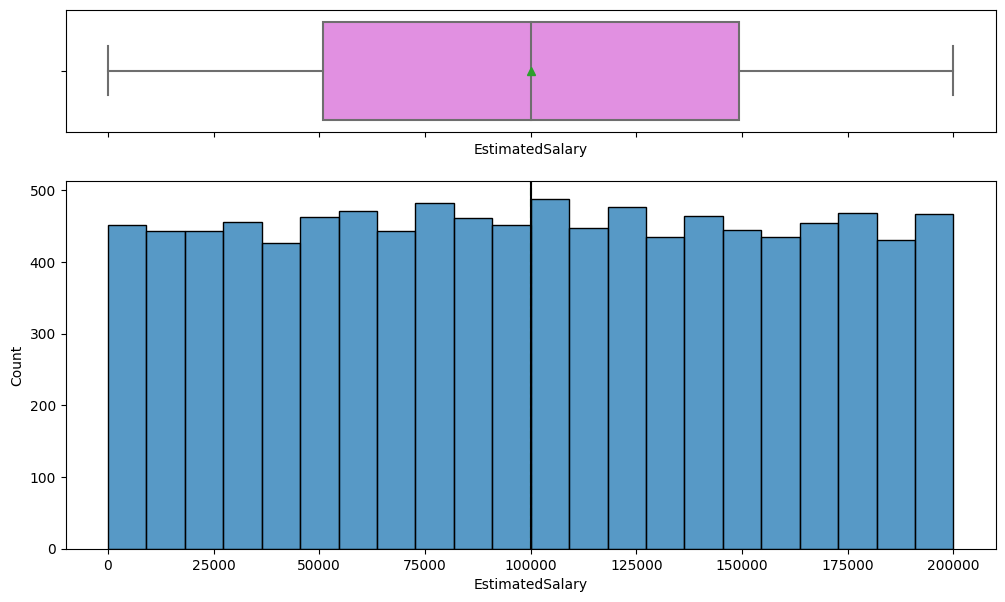

In [ ]:
histogram_boxplot(ds, 'EstimatedSalary')          ## Complete the code to create histogram_boxplot for Estimated Salary

#### Observations on Exited

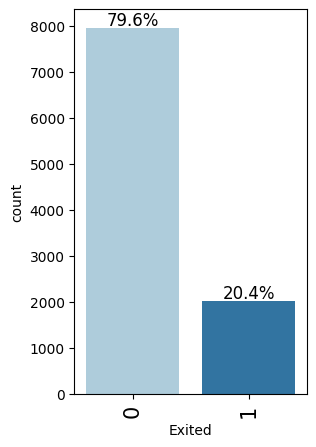

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

#### Observations on Geography

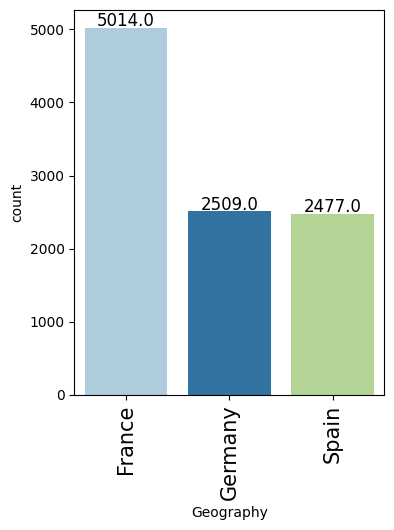

In [ ]:
labeled_barplot(ds,'Geography')               ## Complete the code to create labeled_barplot for Geography

#### Observations on Gender

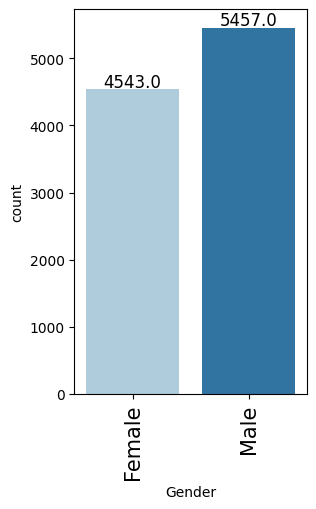

In [ ]:
labeled_barplot(ds,'Gender')               ## Complete the code to create labeled_barplot for Gender

#### Observations on Tenure

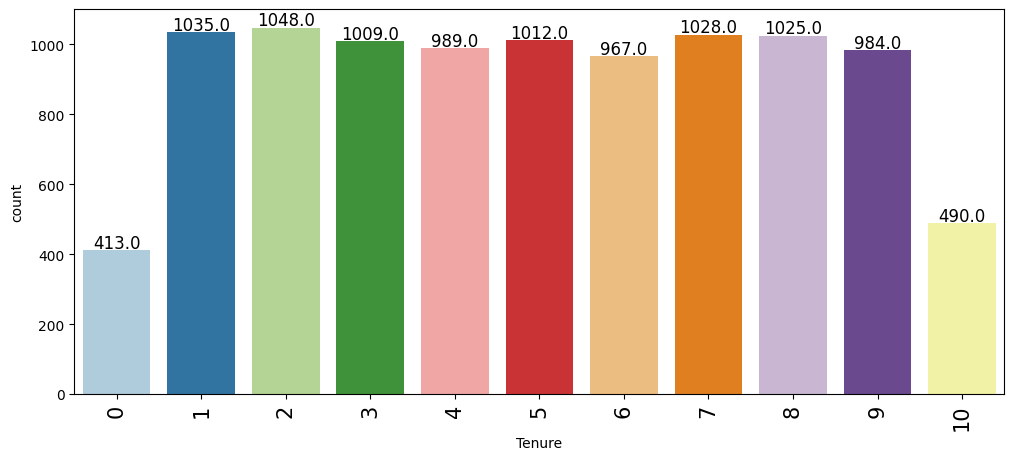

In [ ]:
labeled_barplot(ds,'Tenure')               ## Complete the code to create labeled_barplot for Tenure

#### Observations on Number of Products

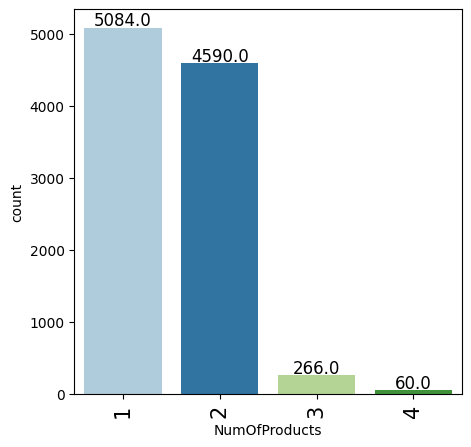

In [ ]:
labeled_barplot(ds,'NumOfProducts')               ## Complete the code to create labeled_barplot for Number of products

#### Observations on Has Credit Card

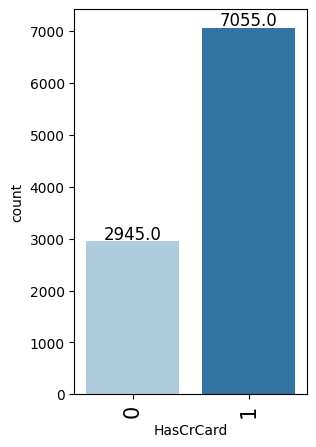

In [ ]:
labeled_barplot(ds,'HasCrCard')               ## Complete the code to create labeled_barplot for Has credit card

#### Observations on Is Active Member

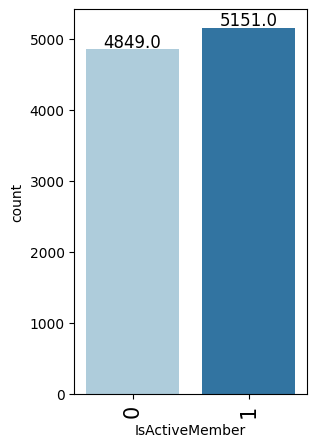

In [ ]:
labeled_barplot(ds,'IsActiveMember')               ## Complete the code to create labeled_barplot for Is active member

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

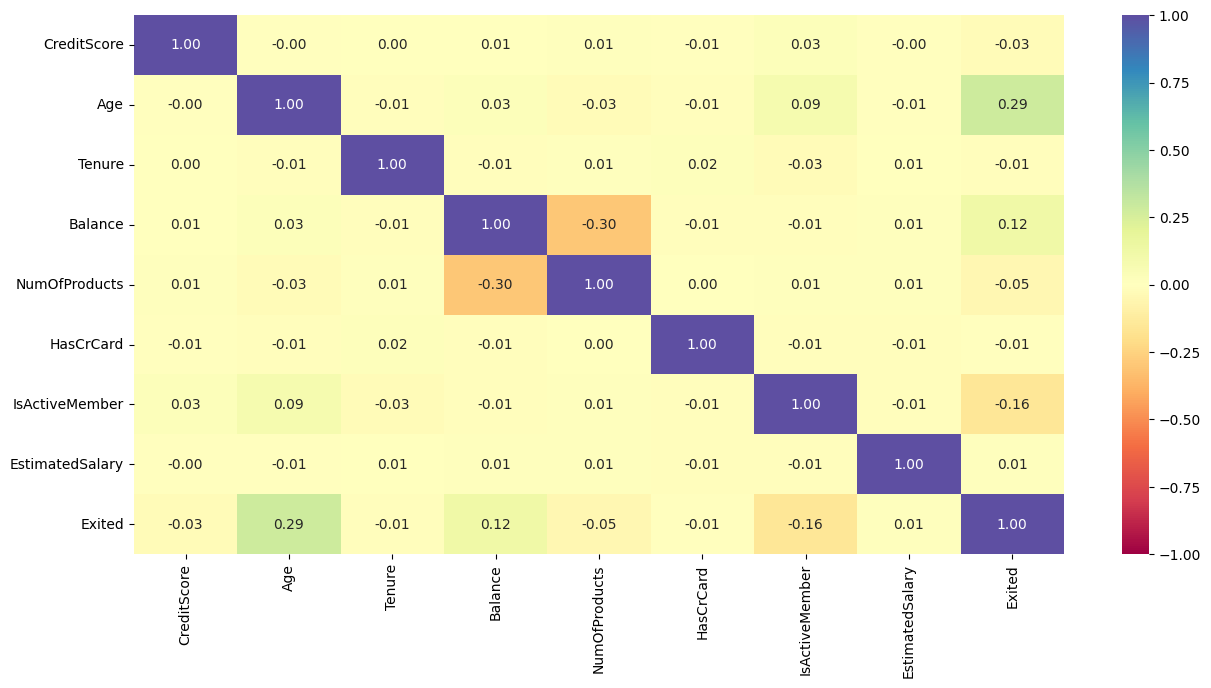

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")          # Complete the code to get the heatmap of the data
plt.show()

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


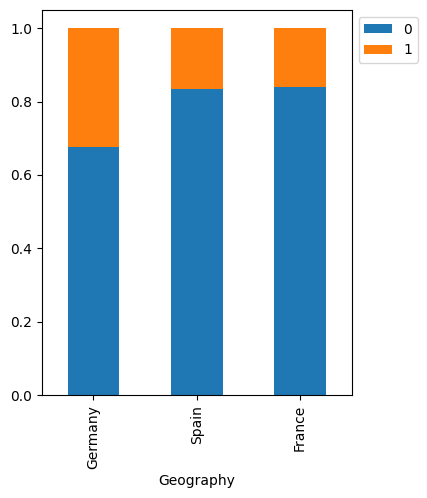

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

#### Exited Vs Number of products

NumOfProducts     1     2    3   4    All
Exited                                   
1              1409   348  220  60   2037
All            5084  4590  266  60  10000
0              3675  4242   46   0   7963
------------------------------------------------------------------------------------------------------------------------


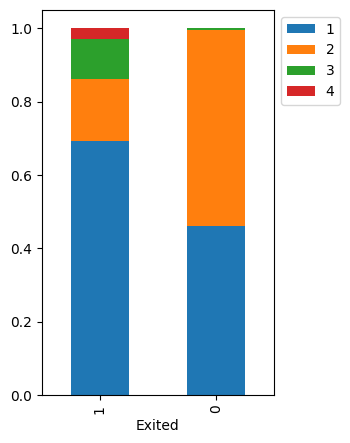

In [ ]:
stacked_barplot(ds,'Exited','NumOfProducts')                   ## Complete the code to plot stacked barplot for Exited and Number of follow ups

#### Exited Vs Has Credit Card

HasCrCard     0     1    All
Exited                      
All        2945  7055  10000
0          2332  5631   7963
1           613  1424   2037
------------------------------------------------------------------------------------------------------------------------


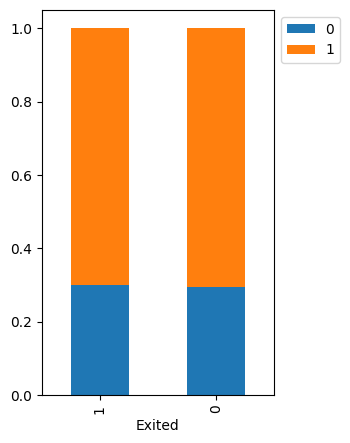

In [ ]:
stacked_barplot(ds,'Exited','HasCrCard')                   ## Complete the code to plot stacked barplot for Exited and Has credit card

#### Exited Vs Is active member

IsActiveMember     0     1    All
Exited                           
All             4849  5151  10000
0               3547  4416   7963
1               1302   735   2037
------------------------------------------------------------------------------------------------------------------------


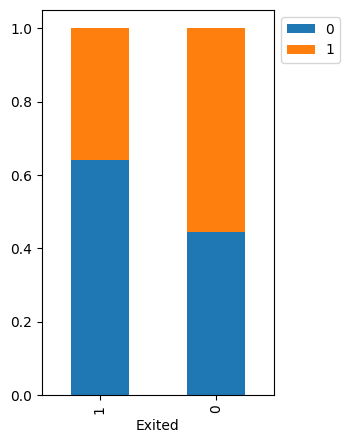

In [ ]:
stacked_barplot(ds,'Exited','IsActiveMember')                   ## Complete the code to plot stacked barplot for Exited and Is active member

#### Exited Vs Credit Score

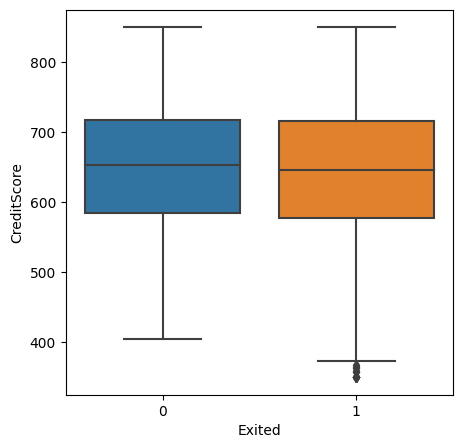

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

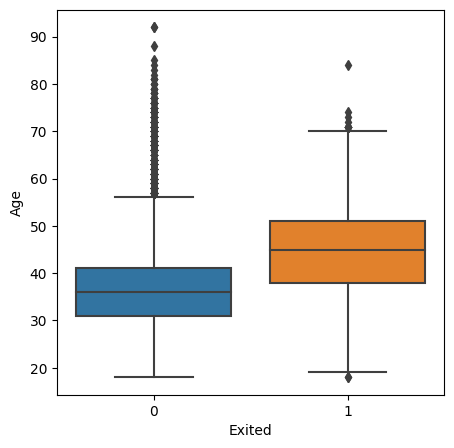

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Age
plt.show()

#### Exited Vs Tenure

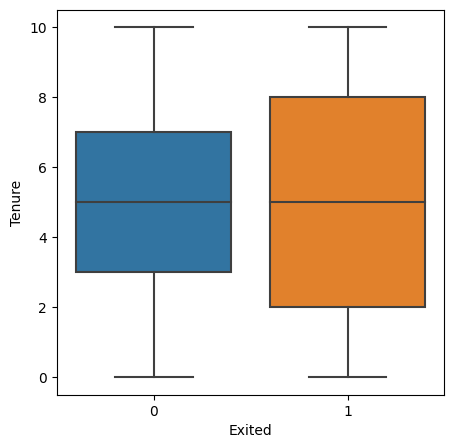

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Tenure
plt.show()

#### Exited Vs Balance

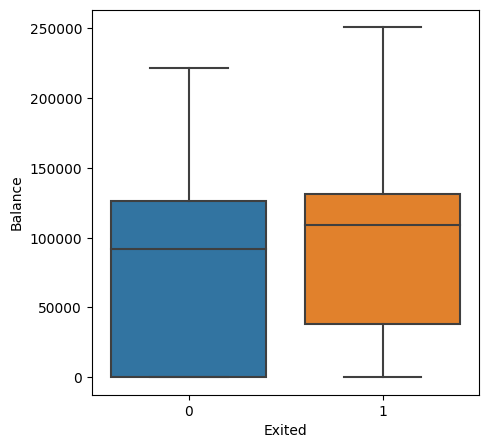

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Balance
plt.show()

#### Exited Vs Number of Products

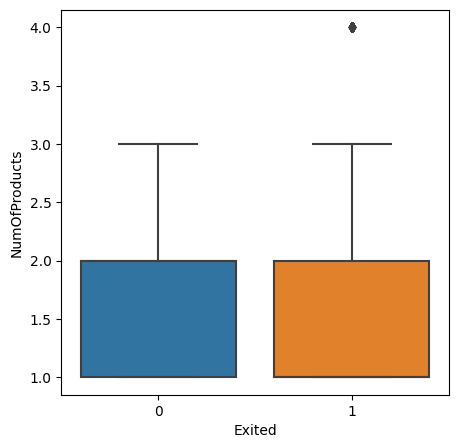

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Number of products
plt.show()

#### Exited Vs Estimated Salary

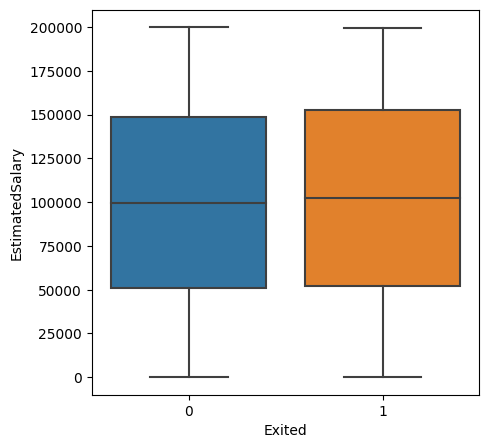

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)               ## Complete the code to plot the boxplot for Exited and Salary
plt.show()

## Data Preprocessing

- We want to predict the churn.
- Before we proceed to build a model, We'll split the data into train and test to be able to evaluate the model that we build on the train data
-  we'll have to encode categorical features.
- We will build a model using the train data and then check it's performance

### Data Preparation for Modeling

In [ ]:
X = ds.drop(['Exited'],axis=1)    ## Complete the code to obtain the independent features into variable X
y = ds[['Exited']]                ## Complete the code to obtain the dependent features into variable y

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

**Create dummy variables for string type variables**

In [ ]:
# Encoding Geography variable
#X_train = pd.get_dummies(X_train, columns=["____","____"],drop_first=True) ## Complete the code to encode Geography and Gender in train set
X_train = pd.get_dummies(X_train, columns=["Geography", "Gender"], drop_first=True)

#X_test = pd.get_dummies(X_test, columns=["____","____"],drop_first=True)   ## Complete the code to encode Geography and Gender in test set
X_test = pd.get_dummies(X_test, columns=["Geography", "Gender"], drop_first=True)

#X_val = pd.get_dummies(X_val, columns=["____","____"],drop_first=True)     ## Complete the code to encode Geography and Gender in validation set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)

**Normalize the numerical data**

In [ ]:
## Complete the below code to scale the data using standardscaler
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
#X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["_____","_____","_____","_____","_____"]])
#X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["_____","_____","_____","_____","_____"]])
#X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["_____","_____","_____","_____","_____"]])

X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]] = temp.transform(X_train[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])
X_test[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]] = temp.transform(X_test[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])
X_val[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]] = temp.transform(X_val[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

**Create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
classifier = Sequential()
# Complete the code to Add the input layer with 64 neurons with relu as activation function with input of 11 variables
#classifier.add(Dense(activation = '_____', input_dim = 11, units=_____))
classifier.add(Dense(units=64, activation='relu', input_dim=11))

# Complete the code to add the 1st hidden layer with 32 neurons
#classifier.add(Dense(_____, activation='relu'))
classifier.add(Dense(units=32, activation='relu'))

# Add the output layer with one node and sigmoid activation function
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
#classifier.add(Dense(1, activation = '_____'))
classifier.add(Dense(units=1, activation='sigmoid'))


In [ ]:
## Complete the code to Compile the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
#classifier.compile(optimizer='_____', loss='_____', metrics=['_____'])
classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
## Complete the code to obtain the summary of the model
#_____.summary()
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Complete the code to fit the model on train data for 100 epochs
#history=classifier.fit(_____, _____,
#          validation_data=(X_val,y_val),
#          epochs=_____,
#          batch_size=32)

history = classifier.fit(X_train, y_train,
                          validation_data=(X_val, y_val),
                          epochs=100,
                          batch_size=32)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4739 - accuracy: 0.7964 - val_loss: 0.4583 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4357 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8034 - val_loss: 0.4306 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.4254 - val_accuracy: 0.8144

**Loss function**

63/63 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8570


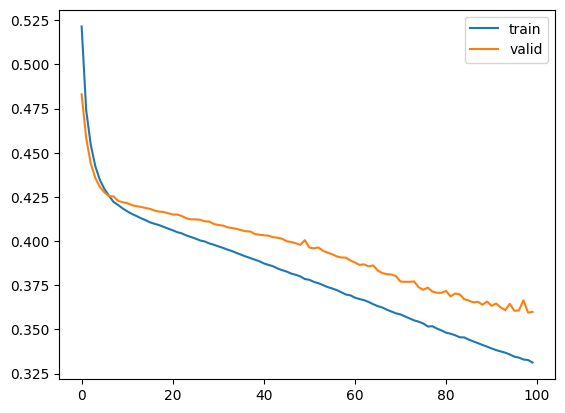

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
#results = classifier.evaluate(_____, _____)
results = classifier.evaluate(X_test, y_test)

**Confusion matrix**

50/50 [==============================] - 0s 2ms/step


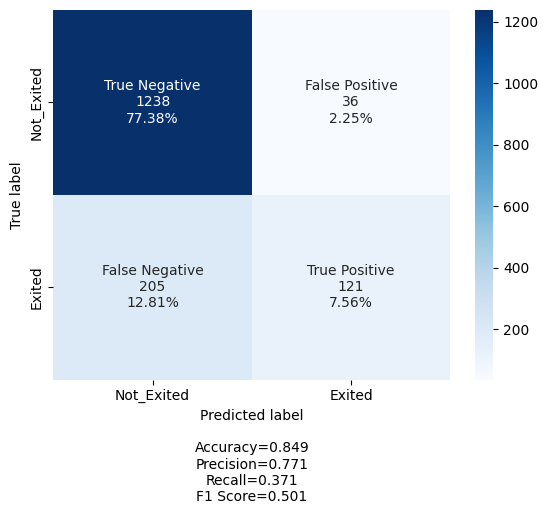

In [ ]:
## Complete the code to obtain the prediction on X_val and obtain the confusion matrix
y_pred1=classifier.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      ##Complete the code to add the input layer with 64 neurons and relu as activation function
      #model.add(Dense(_____,activation='_____',input_dim = X_train.shape[1]))
      model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

      ## Complete the code to add the first hidden layer with 32 neurons with relu as activation functions
      #model.add(Dense(_____,activation='relu'))
      model.add(Dense(32, activation='relu'))

      ## Complete the code to add the output layer with Sigmoid Activation
      #model.add(Dense(1, activation = '_____'))
      model.add(Dense(1, activation='sigmoid'))

      ## Complete the code to initialize the model with Adam Optimer
      #optimizer = tf.keras.optimizers._____(0.001)
      optimizer = tf.keras.optimizers.Adam(0.001)

      ## Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
      #model.compile(loss='_____',optimizer=optimizer,metrics=['accuracy'])
      model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

      return model

In [ ]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Complete the code to fit the model on train data
#history = model.fit(_____,_____,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), epochs=100, verbose=1)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4512 - accuracy: 0.7998 - val_loss: 0.4334 - val_accuracy: 0.8106
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8283 - val_loss: 0.4177 - val_accuracy: 0.8263
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8327 - val_loss: 0.4077 - val_accuracy: 0.8344
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8356 - val_loss: 0.4027 - val_accuracy: 0.8331
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8403 - val_loss: 0.3967 - val_accuracy: 0.8350
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8473 - val_loss: 0.3878 - val_accuracy: 0.8425
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.8480 - val_loss: 0.3799 - val_accuracy: 0.8469

**Loss function**

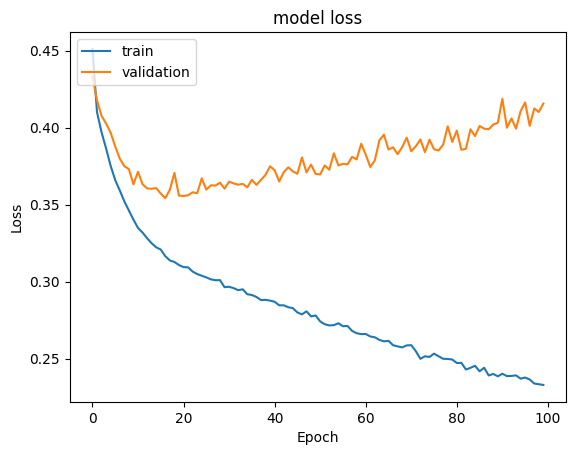

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As you can see from the above image, this model is severely overfitting. Deep learning models are very sensitive to overfitting due to a large number of parameters. We need to find the optimal point where the training should be stopped.

The best solution for the above problem is **Early stopping**.

**Early stopping:**

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after certain iterations. The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [ ]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## Complete the code to call the create_model() function
#model_e=______()
model_e=create_model()

model_e.summary()

## Complete the code to train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
#history_e = model_e.fit(_____,_____,batch_size=32,epochs=_____,verbose=1,validation_data=(_____,_____),callbacks=[es_cb])
history_e = model_e.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=[es_cb])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4674 - accuracy: 0.7867 - val_loss: 0.4273 - val_accuracy: 0.8169
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8238 - val_loss: 0.4140 - val_accuracy: 0.823

**Loss function**

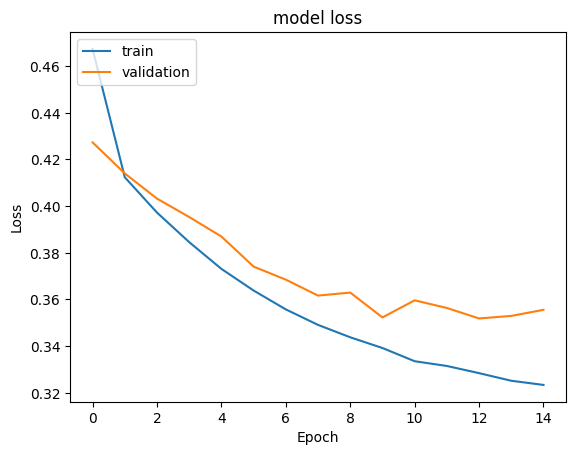

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.167119, G-Mean=0.802


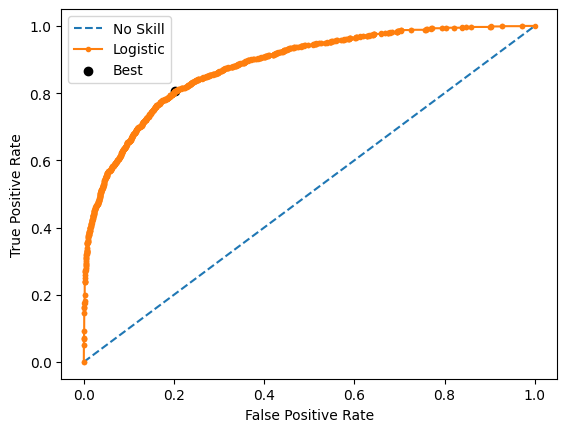

In [ ]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [ ]:
#SNSU99
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_me1 = (y_pred_e > thresholds[ix])
y_pred_me1

#Predicting the results using best as a threshold
#y_pred_e=model_3.predict(X_val)
#y_pred_3 = (y_pred_e > thresholds[ix])
#y_pred_3

50/50 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [ ]:
##SNSU99 this whole cell was commented by SNS
## Complete the code to obtain the classification report Hint: use y_val
cr=metrics.classification_report(y_val, y_pred_me1)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1274
           1       0.48      0.77      0.59       326

    accuracy                           0.78      1600
   macro avg       0.70      0.78      0.72      1600
weighted avg       0.84      0.78      0.80      1600



**Confusion matrix**

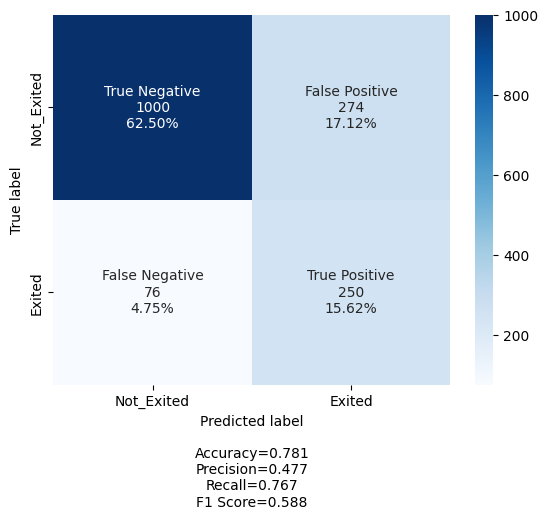

In [ ]:
## This whole cell was commented by SNS
## Complete the code with y_val and y_pred_e to plot the confusion matrix

#cm1=confusion_matrix(_____, _____)
cm1 = confusion_matrix(y_val, y_pred_me1)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                     categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Complete the code to add dropout with dropout_rate= 0.2
#model_3.add(Dropout(_____))
model_3.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
#model_3.add(Dense(16,activation='relu'))
model_3.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate= 0.1
#model_3.add(Dropout(_____))
model_3.add(Dropout(0.1))

# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
#model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['______'])
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5123 - accuracy: 0.7588 - val_loss: 0.4538 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4515 - accuracy: 0.7967 - val_loss: 0.4376 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4369 - accuracy: 0.8025 - val_loss: 0.4335 - val_accuracy: 0.8031
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4310 - accuracy: 0.8073 - val_loss: 0.4329 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4323 - accuracy: 0.8066 - val_loss: 0.4276 - val_accuracy: 0.8131
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4300 - accuracy: 0.8119 - val_loss: 0.4229 - val_accuracy: 0.8200
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4240 - accuracy: 0.8197 - val_loss: 0.4189 - val_accuracy: 0.8200

**Loss function**

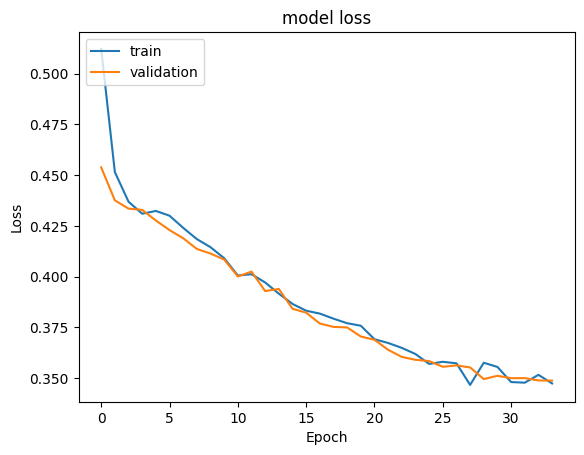

In [ ]:
# Complete the code to plot the Train Loss and Validation Loss
#plt.plot(history_3.history['_____'])
#plt.plot(history_3.history['_____'])
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.220600, G-Mean=0.793


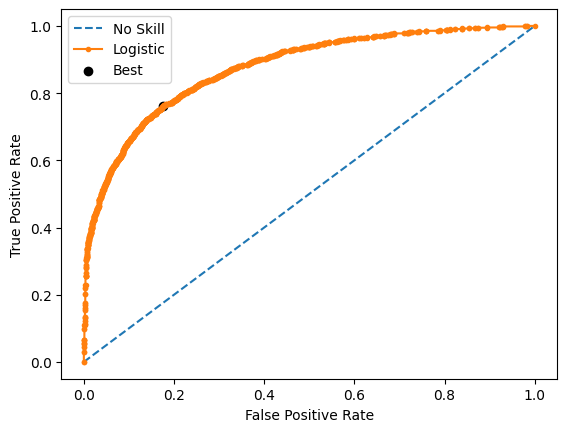

In [ ]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [ ]:
# Complete the code to obtain the classification report
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1274
           1       0.51      0.75      0.61       326

    accuracy                           0.81      1600
   macro avg       0.72      0.78      0.74      1600
weighted avg       0.84      0.81      0.82      1600



**Confusion report**

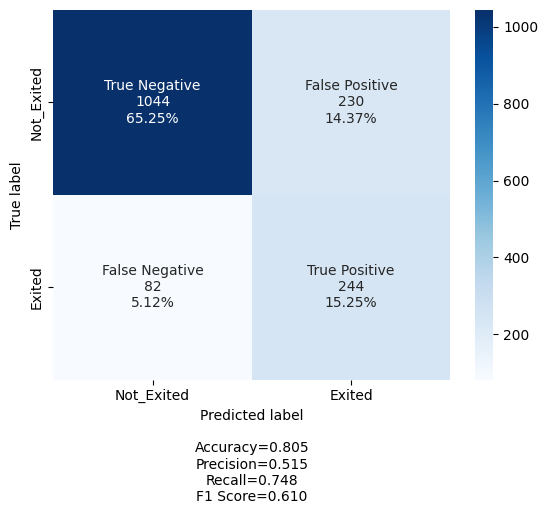

In [ ]:
# Complete the code to obtain the confusion matrix

cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):
    np.random.seed(1337)

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Complete the code by adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Complete the code to compile the model using binary_crossentropy as loss
    #model.compile(optimizer = optimizer,loss = '_____', metrics = ['accuracy'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

**Using Grid search**

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [ ]:
## Complete the code by calling the creat_model_v2 function in KerasClassifier
#keras_estimator = KerasClassifier(build_fn=_____, verbose=1)
keras_estimator = KerasClassifier(build_fn=create_model_v2, verbose=1, lr=0.01)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
# Complete the code by using the the defined keras_estimator as estimator.
#grid = GridSearchCV(estimator=_____,
#                    verbose=1,
#                    cv=kfold_splits,
#                    param_grid=param_grid,n_jobs=-1)

grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,
                    n_jobs=-1)



In [ ]:
## Complete the code to fit the model on train data and use x_val and y_val as validation data
#grid_result = grid.fit(_____, _____,validation_data = (_____,_____),verbose=1)
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1)


# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
160/160 [==============================] - 1s 3ms/step - loss: 0.4548 - accuracy: 0.8034 - val_loss: 0.4318 - val_accuracy: 0.8150
Best: 0.814376 using {'batch_size': 40, 'lr': 0.01}


**Let's create the final model with the obtained configuration after hyperparameter tuning**

In [ ]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Complete the code to fit the model on train data abd train the model with best batch_size obtained from hyperparameter tuning
#history_h=estimator_v2.fit(_____, _____, epochs=100, batch_size = grid_result.best_params_['_____'], verbose=1,validation_data=(X_val,y_val))
history_h = estimator_v2.fit(X_train, y_train, epochs=100, batch_size=40, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4525 - accuracy: 0.8006 - val_loss: 0.4373 - val_accuracy: 0.8119
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4271 - accuracy: 0.8203 - val_loss: 0.4170 - val_accuracy: 0.8275
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8269 - val_loss: 0.4137 - val_accuracy: 0.8213
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8280 - val_loss: 0.4142 - val_accuracy: 0.8344
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8313 - val_loss: 0.3877 - val_accuracy: 0.8313
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8352 - val_loss: 0.3856 - val_accuracy: 0.8388
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8398 - val_loss: 0.3779 - val_accuracy: 0.8394

**Loss function**

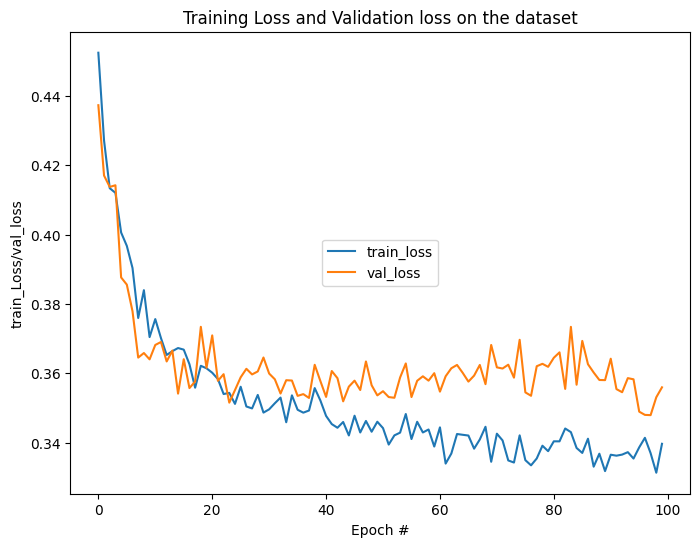

In [ ]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

**Threshold**

200/200 [==============================] - 0s 1ms/step
Best Threshold=0.219294, G-Mean=0.808


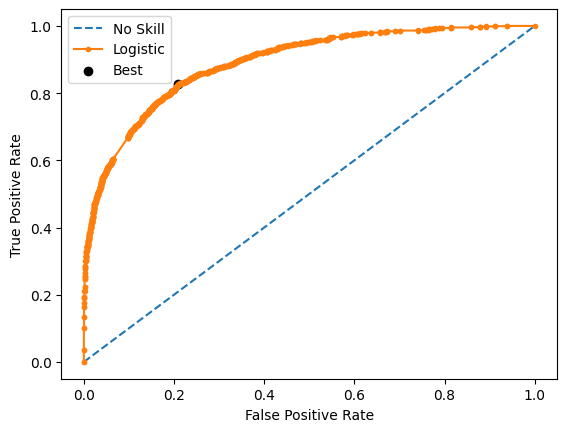

In [ ]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [ ]:
# Complete the code to obtain the predictions on X_val
y_pred_h = estimator_v2.predict(X_val)
print(y_pred_h)

50/50 [==============================] - 0s 1ms/step
[[0.11677218]
 [0.00327967]
 [0.07351403]
 ...
 [0.11249637]
 [0.34818175]
 [0.64776564]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


**Classification report**

In [ ]:
# Complete the code to obtain the classification report
#cr=metrics._____(y_val,y_pred_h)
cr= classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1274
           1       0.46      0.77      0.57       326

    accuracy                           0.77      1600
   macro avg       0.69      0.77      0.71      1600
weighted avg       0.83      0.77      0.79      1600



**Confusion matrix**

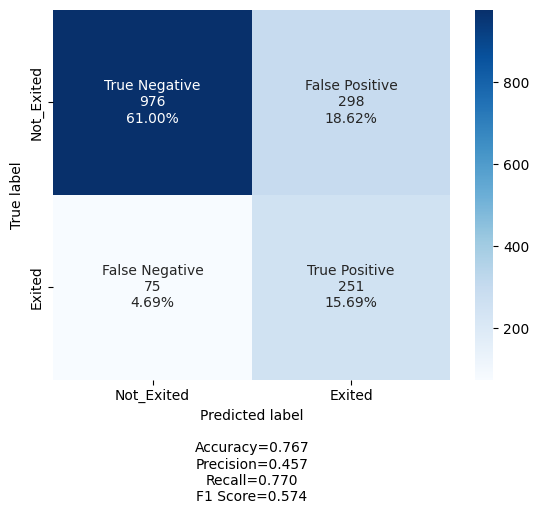

In [ ]:
## Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with balanced data

**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
## Complete the code to apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



<Axes: ylabel='count'>

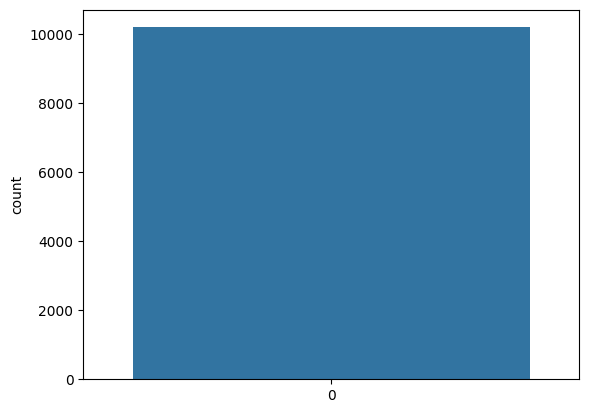

In [ ]:
sns.countplot(y_train['Exited'])

**Build a model with the balanced dataset**

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
## Complete the code to initilaize a sequential model
#model_4 = _____()
model_4=Sequential()

# Complete the code to add a input layer of 32 neurons with relu as activation function
#model_4.add(Dense(_____,activation='____',input_dim = X_train.shape[1]))
model_4.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))

# Complete the code to add dropout with dropout rate=0.2
#model_4.add(_____(0.2))
model_4.add(Dropout(0.2))

# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))

# Adding the dropout
model_4.add(Dropout(0.1))

## Complete the code to add dense layers with 8 neurons
#model_4.add(Dense(_____,activation='relu'))
model_4.add(Dense(8, activation='relu'))

# Complete the code to add suitable activation function in the final layer
#model_4.add(Dense(1, activation = '_____'))
model_4.add(Dense(1, activation='sigmoid'))


In [ ]:
## Complete the code to obtain the summary of the model
#model_4._____()
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
# Complete the code to define earlystopping as callback
#es_cb = callbacks._____(monitor='val_loss', min_delta=0.001, patience=5)
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Complete the code to fit the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
#history_4 = model_4.fit(_____,_____,batch_size=___,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[_____])
history_4 = model_4.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=[es_cb])

Epoch 1/100
160/160 [==============================] - 2s 4ms/step - loss: 0.6432 - accuracy: 0.6333 - val_loss: 0.5592 - val_accuracy: 0.7262
Epoch 2/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5762 - accuracy: 0.7093 - val_loss: 0.5494 - val_accuracy: 0.7312
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.7249 - val_loss: 0.5267 - val_accuracy: 0.7362
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7318 - val_loss: 0.5455 - val_accuracy: 0.7200
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7326 - val_loss: 0.5335 - val_accuracy: 0.7256
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.7354 - val_loss: 0.5341 - val_accuracy: 0.7294
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.7437 - val_loss: 0.5129 - val_accuracy: 0.7375

**Loss function**

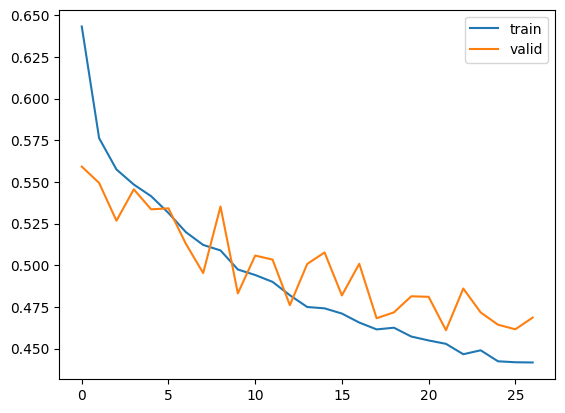

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

**Finding the optimal  threshold**

319/319 [==============================] - 1s 1ms/step
Best Threshold=0.486688, G-Mean=0.820


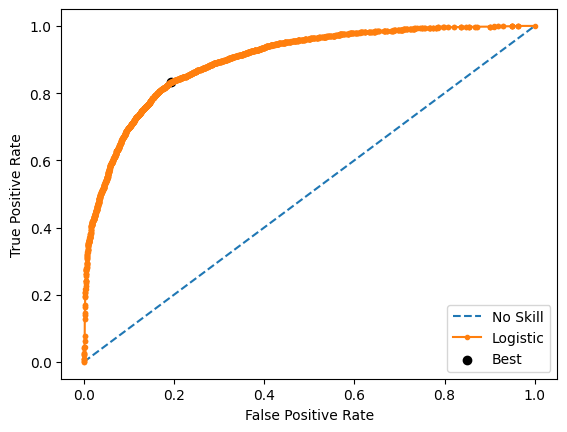

In [ ]:
## Complete the code to find the optimal threshold using X_train
#yhat = model_4.predict(_____)
yhat = model_4.predict(X_train)


# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
## Complete the code to obtain the predictions on X_val
#y_pred_s = model_4.predict(_____)
y_pred_s = model_4.predict(X_val)

#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [ ]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1274
           1       0.45      0.72      0.56       326

    accuracy                           0.77      1600
   macro avg       0.68      0.75      0.70      1600
weighted avg       0.82      0.77      0.78      1600



**Confusion matrix**

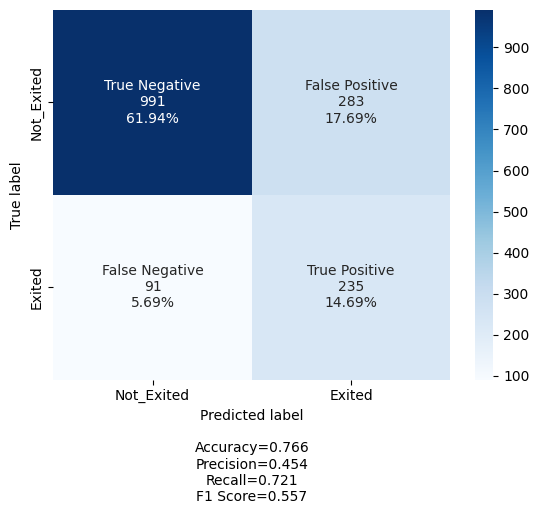

In [ ]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Final Model




319/319 [==============================] - 1s 1ms/step
Best Threshold=0.230689, G-Mean=0.815


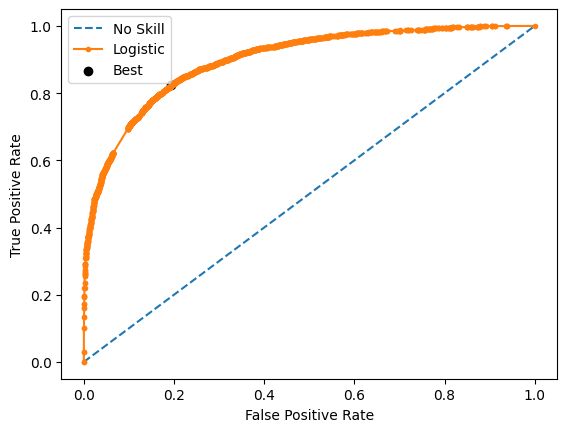

In [ ]:
# predict probabilities using the best model
#yhat = ___________.predict(X_train)
yhat = estimator_v2.predict(X_train)  ## SNSU99
#yhat = classifier.predict(X_train) #SNSU99
#yhat = model.predict(X_train) #SNSU99
#yhat = model_e.predict(X_train) #SNSU99
#yhat = model_h.predict(X_train) #SNSU99
#yhat = model_3.predict(X_train) #SNSU99
#yhat = model_4.predict(X_train) #SNSU99

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Complete the code to Predict the X_test data using the best model
bestmodel = estimator_v2
y_pred_test = bestmodel.predict(X_test)  # SNSU99
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


**Classification report**

In [ ]:
## Complete the code to obtain the classification report on y_test and the predicted values
#cr=metrics.classification_report(_____,_____)
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1593
           1       0.48      0.77      0.59       407

    accuracy                           0.78      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.78      0.80      2000



**Confusion report**

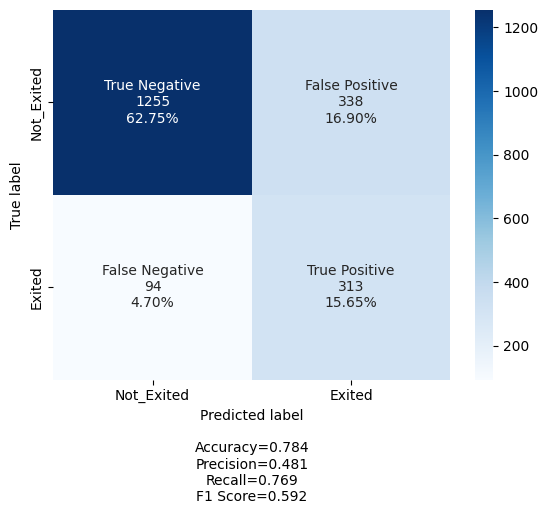

In [ ]:
# Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Actionable Insights and Business Recommendations

*

_____